# Imports

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from IPython.display import display
import shutil
import tensorflow as tf

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img


In [60]:
current_directory = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
csv_path = os.path.join(parent_directory, "raw_data/computer_vision/pokemon.csv")
df = pd.read_csv(csv_path)


In [61]:
images_directory = os.path.join(parent_directory, "raw_data/computer_vision/images/")


# Exploration

In [62]:
df.head()


,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [63]:
images_directory


'/home/morgane/code/mtthibault/catchemall/raw_data/computer_vision/images/'

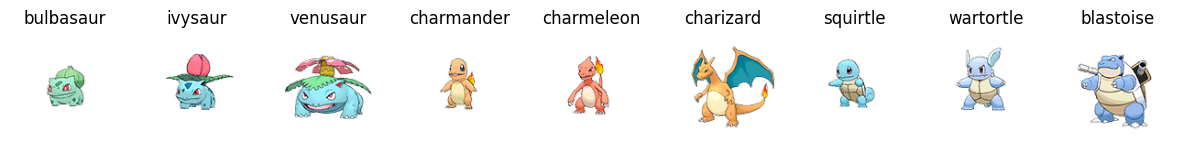

In [64]:
fig, axes = plt.subplots(1, 9, figsize=(15, 5))

for i, nom_pokemon in enumerate(df['Name'].head(9)):
    chemin_image_png = images_directory + nom_pokemon.lower() + ".png"
    chemin_image_jpg = images_directory + nom_pokemon.lower() + ".jpg"

    if os.path.exists(chemin_image_png):
        chemin_image = chemin_image_png
    elif os.path.exists(chemin_image_jpg):
        chemin_image = chemin_image_jpg
    else:
        print(f"Aucun fichier trouvé pour {nom_pokemon}")
        continue

    img = Image.open(chemin_image)

    axes[i].imshow(img)
    axes[i].set_title(nom_pokemon)
    axes[i].axis('off')

plt.show()


# Création dossiers par type de Pokémon

In [65]:
types = set(df['Type1'])
types


{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

In [66]:
parent_directory


'/home/morgane/code/mtthibault/catchemall'

In [67]:
types_directory = os.path.join(parent_directory, "raw_data/computer_vision/types/")
types_directory


'/home/morgane/code/mtthibault/catchemall/raw_data/computer_vision/types/'

In [68]:
for pokemon_type in types:
    type_directory_path = os.path.join(types_directory, pokemon_type)
    # Pour vérifier si dossier existe déjà, sinon créer
    if not os.path.exists(type_directory_path):
        os.makedirs(type_directory_path)


# Rangement des pokémons par dossier Type

In [69]:
for index, row in df.iterrows():
    pokemon_name = row['Name']
    type1 = row['Type1']
    type2 = str(row['Type2'])  # str pcq sinon ça bug à cause des NaN

    type1_directory_path = os.path.join(types_directory, type1)
    if os.path.exists(type1_directory_path):
        for ext in ['jpg', 'png']:
            source_image_path = os.path.join(images_directory, f'{pokemon_name}.{ext}')
            if os.path.exists(source_image_path):
                destination_path = os.path.join(type1_directory_path, f'{pokemon_name}.{ext}')
                shutil.copy(source_image_path, destination_path)
                break

    # Vérifier si le type 2 existe et copier l'image
    if type2:
        type2_directory_path = os.path.join(types_directory, type2)
        if os.path.exists(type2_directory_path):
            for ext in ['jpg', 'png']:
                source_image_path = os.path.join(images_directory, f'{pokemon_name}.{ext}')
                if os.path.exists(source_image_path):
                    destination_path = os.path.join(type2_directory_path, f'{pokemon_name}.{ext}')
                    shutil.copy(source_image_path, destination_path)
                    break


# Exploration

In [70]:
types_path = '/home/morgane/code/mtthibault/catchemall/raw_data/computer_vision/types'
types_path


'/home/morgane/code/mtthibault/catchemall/raw_data/computer_vision/types'

In [71]:
pokemon_dict = {}


In [72]:
os.listdir(types_path)


['Ghost',
 'Fighting',
 'Ground',
 'Dark',
 'Flying',
 'Normal',
 'Steel',
 'Grass',
 'Ice',
 'Rock',
 'Water',
 'Electric',
 'Psychic',
 'Bug',
 'Fairy',
 'Fire',
 'Poison',
 'Dragon']

In [76]:
for type_folder in os.listdir(types_path):
    type_folder_path = os.path.join(types_path, type_folder) #donc là j'ai le chemin pour chaqun de mes folders TYPE

    # vérifie si le chemin est un dossier
    if os.path.isdir(type_folder_path):
        pokemon_names = [] # Jstock les noms des pokémons pour le type actuel

        # parcours de chaque image dans le dossier du type actuel
        for file_name in os.listdir(type_folder_path):
            # pour gérer png jpg
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                pokemon_name = os.path.splitext(file_name)[0] #pour split l'extension .png .jpg cimer chatgpt
                pokemon_names.append(pokemon_name) #J'ajoute le nom du pokémon à la liste

        pokemon_dict[type_folder] = pokemon_names


In [77]:
pokemon_dict


{'Ghost': ['golett',
  'aegislash-blade',
  'frillish',
  'sandygast',
  'duskull',
  'golurk',
  'decidueye',
  'gengar',
  'gastly',
  'palossand',
  'gourgeist-average',
  'froslass',
  'hoopa-confined',
  'shedinja',
  'shuppet',
  'haunter',
  'yamask',
  'chandelure',
  'rotom',
  'jellicent',
  'dhelmise',
  'honedge',
  'marshadow',
  'mismagius',
  'dusclops',
  'blacephalon',
  'misdreavus',
  'trevenant',
  'litwick',
  'giratina-altered',
  'dusknoir',
  'lampent',
  'doublade',
  'banette',
  'sableye',
  'phantump',
  'pumpkaboo-average',
  'cofagrigus',
  'drifloon',
  'lunala',
  'spiritomb',
  'drifblim',
  'mimikyu'],
 'Fighting': ['hitmonchan',
  'mankey',
  'stufful',
  'infernape',
  'hariyama',
  'gurdurr',
  'pancham',
  'combusken',
  'keldeo-ordinary',
  'mienshao',
  'crabrawler',
  'pheromosa',
  'blaziken',
  'mienfoo',
  'throh',
  'hitmonlee',
  'kommo-o',
  'hawlucha',
  'pignite',
  'conkeldurr',
  'marshadow',
  'lucario',
  'timburr',
  'crabominable',

In [78]:
len(pokemon_dict['Bug'])


77

In [83]:
pokemon_names


['axew',
 'salamence',
 'guzzlord',
 'shelgon',
 'goodra',
 'dragonite',
 'haxorus',
 'kingdra',
 'druddigon',
 'goomy',
 'vibrava',
 'sliggoo',
 'flygon',
 'zekrom',
 'tyrunt',
 'drampa',
 'noibat',
 'dragonair',
 'dialga',
 'gible',
 'noivern',
 'kommo-o',
 'gabite',
 'zweilous',
 'jangmo-o',
 'naganadel',
 'latias',
 'hydreigon',
 'fraxure',
 'latios',
 'rayquaza',
 'hakamo-o',
 'deino',
 'kyurem',
 'dragalge',
 'giratina-altered',
 'dratini',
 'reshiram',
 'altaria',
 'palkia',
 'tyrantrum',
 'zygarde-50',
 'turtonator',
 'garchomp',
 'bagon']

Type: Ghost


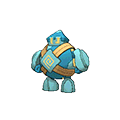

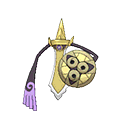

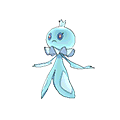



Type: Fighting


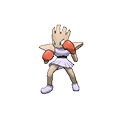

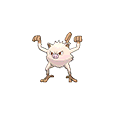

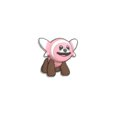



Type: Ground


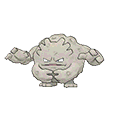

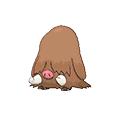

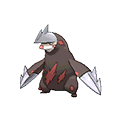



Type: Dark


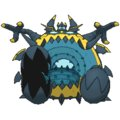

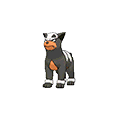

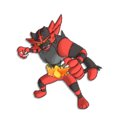



Type: Flying


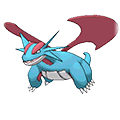

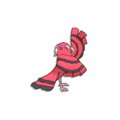

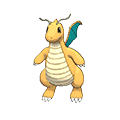



Type: Normal


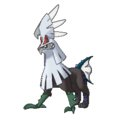

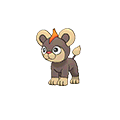

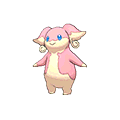



Type: Steel


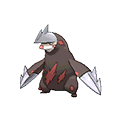

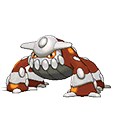

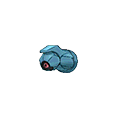



Type: Grass


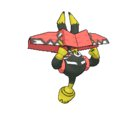

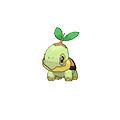

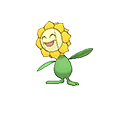



Type: Ice


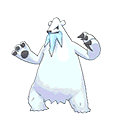

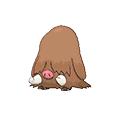

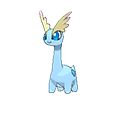



Type: Rock


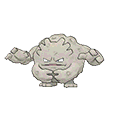

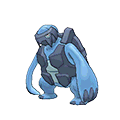

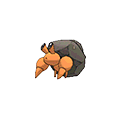



Type: Water


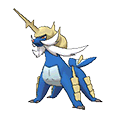

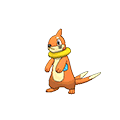

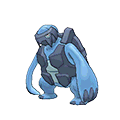



Type: Electric


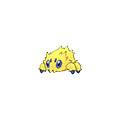

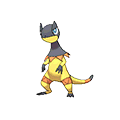

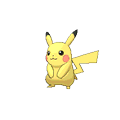



Type: Psychic


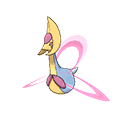

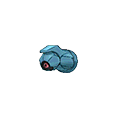

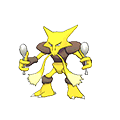



Type: Bug


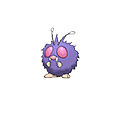

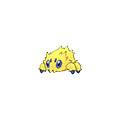

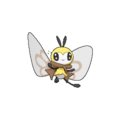



Type: Fairy


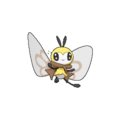

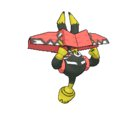

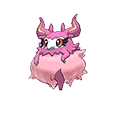



Type: Fire


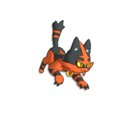

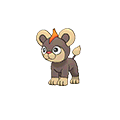

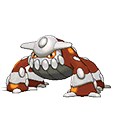



Type: Poison


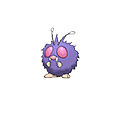

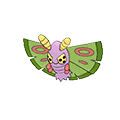

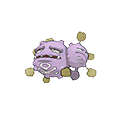



Type: Dragon


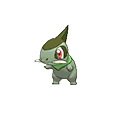

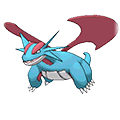

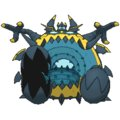

In [82]:
num_images_to_display = 3

for pokemon_type, pokemon_names in pokemon_dict.items():
    print(f"Type: {pokemon_type}")
    for i in range(min(num_images_to_display, len(pokemon_names))):
        for extension in ['.jpg', '.jpeg', '.png']:
            image_path = os.path.join(types_path, pokemon_type, f"{pokemon_names[i]}{extension}")
            if os.path.exists(image_path):
                display(Image(filename=image_path))
                break
    print("\n")


# Analyse

In [89]:
y = list(df['Type1'].unique())
y


['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']